In [1]:
!pip install statsbombpy

     |████████████████████████████████| 144 kB 34.1 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 207 kB 23.0 MB/s 
     |████████████████████████████████| 127 kB 42.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.3.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.3.2 which is incomp

In [2]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 4.7 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=4a5824b49baafde22e87181088b5890e8f0cb0f50aaf34f74092f630c24a901d
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [3]:
from statsbombpy import sb

In [4]:
events = sb.events(match_id = 22912)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [5]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [6]:
events_1=events[events['team']=='Liverpool']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Liverpool,Starting XI,0,NaN,NaN,NaN,NaN
2,Liverpool,Half Start,0,NaN,NaN,NaN,NaN
4,Liverpool,Half Start,45,NaN,NaN,NaN,NaN
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,Joël Andre Job Matip
7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,Sadio Mané
...,...,...,...,...,...,...,...
3154,Liverpool,Substitution,57,NaN,NaN,Roberto Firmino Barbosa de Oliveira,NaN
3155,Liverpool,Substitution,61,NaN,NaN,Georginio Wijnaldum,NaN
3159,Liverpool,Substitution,88,NaN,NaN,Sadio Mané,NaN
3161,Liverpool,Tactical Shift,77,NaN,NaN,NaN,NaN


In [7]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
3154,Liverpool,Substitution,57,NaN,NaN,Roberto Firmino Barbosa de Oliveira,NaN
3155,Liverpool,Substitution,61,NaN,NaN,Georginio Wijnaldum,NaN
3159,Liverpool,Substitution,88,NaN,NaN,Sadio Mané,NaN


In [8]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,Joël Andre Job Matip
1,7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,Sadio Mané
2,9,Liverpool,Pass,0,"[66.5, 15.1]","[83.7, 18.0]",Fábio Henrique Tavares,Roberto Firmino Barbosa de Oliveira
3,11,Liverpool,Pass,0,"[76.1, 20.3]","[87.3, 21.2]",Jordan Brian Henderson,Sadio Mané
4,13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",Virgil van Dijk,Georginio Wijnaldum
...,...,...,...,...,...,...,...,...
321,888,Liverpool,Pass,94,"[63.8, 54.7]","[96.4, 72.6]",Divock Okoth Origi,Mohamed Salah
322,889,Liverpool,Pass,94,"[97.6, 61.3]","[93.5, 56.7]",Mohamed Salah,Divock Okoth Origi
323,890,Liverpool,Pass,94,"[93.5, 56.7]","[119.8, 55.5]",Divock Okoth Origi,Mohamed Salah
324,893,Liverpool,Pass,94,"[39.7, 51.9]","[56.4, 59.3]",Joël Andre Job Matip,Trent Alexander-Arnold


In [9]:
pass_events=pass_events[pass_events['minute']<57]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,Joël Andre Job Matip
1,7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,Sadio Mané
2,9,Liverpool,Pass,0,"[66.5, 15.1]","[83.7, 18.0]",Fábio Henrique Tavares,Roberto Firmino Barbosa de Oliveira
3,11,Liverpool,Pass,0,"[76.1, 20.3]","[87.3, 21.2]",Jordan Brian Henderson,Sadio Mané
4,13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",Virgil van Dijk,Georginio Wijnaldum
...,...,...,...,...,...,...,...,...
216,567,Liverpool,Pass,53,"[18.2, 45.3]","[5.2, 64.2]",Jordan Brian Henderson,Joël Andre Job Matip
217,568,Liverpool,Pass,53,"[6.9, 77.5]","[77.4, 74.0]",Joël Andre Job Matip,NaN
218,579,Liverpool,Pass,56,"[33.7, 45.3]","[48.9, 54.5]",Virgil van Dijk,Jordan Brian Henderson
219,580,Liverpool,Pass,56,"[48.9, 54.5]","[56.4, 44.2]",Jordan Brian Henderson,Roberto Firmino Barbosa de Oliveira


In [10]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Alisson Ramsés Becker,Andrew Robertson,3
1,Alisson Ramsés Becker,Fábio Henrique Tavares,2
2,Alisson Ramsés Becker,Joël Andre Job Matip,3
3,Alisson Ramsés Becker,Sadio Mané,1
4,Alisson Ramsés Becker,Trent Alexander-Arnold,1
...,...,...,...
74,Virgil van Dijk,Jordan Brian Henderson,2
75,Virgil van Dijk,Joël Andre Job Matip,4
76,Virgil van Dijk,Mohamed Salah,2
77,Virgil van Dijk,Sadio Mané,1


In [11]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [12]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Alisson Ramsés Becker,Andrew Robertson,7
1,Alisson Ramsés Becker,Fábio Henrique Tavares,3
2,Alisson Ramsés Becker,Joël Andre Job Matip,3
3,Alisson Ramsés Becker,Mohamed Salah,3
4,Alisson Ramsés Becker,Sadio Mané,2
...,...,...,...
78,Virgil van Dijk,Jordan Brian Henderson,2
79,Virgil van Dijk,Joël Andre Job Matip,5
80,Virgil van Dijk,Mohamed Salah,3
81,Virgil van Dijk,Sadio Mané,1


In [13]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [14]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,40.000000
mean,4.875000
std,2.866137
min,3.000000
25%,3.000000
50%,3.500000
75%,6.000000
max,16.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Alisson Ramsés Becker,Andrew Robertson,3.076923
1,Alisson Ramsés Becker,Fábio Henrique Tavares,0.000000
2,Alisson Ramsés Becker,Joël Andre Job Matip,0.000000
3,Alisson Ramsés Becker,Mohamed Salah,0.000000
4,Alisson Ramsés Becker,Virgil van Dijk,3.076923
5,Andrew Robertson,Alisson Ramsés Becker,0.000000
6,Andrew Robertson,Fábio Henrique Tavares,1.538462
7,Andrew Robertson,Georginio Wijnaldum,0.769231
8,Andrew Robertson,Mohamed Salah,3.076923
9,Andrew Robertson,Roberto Firmino Barbosa de Oliveira,4.615385


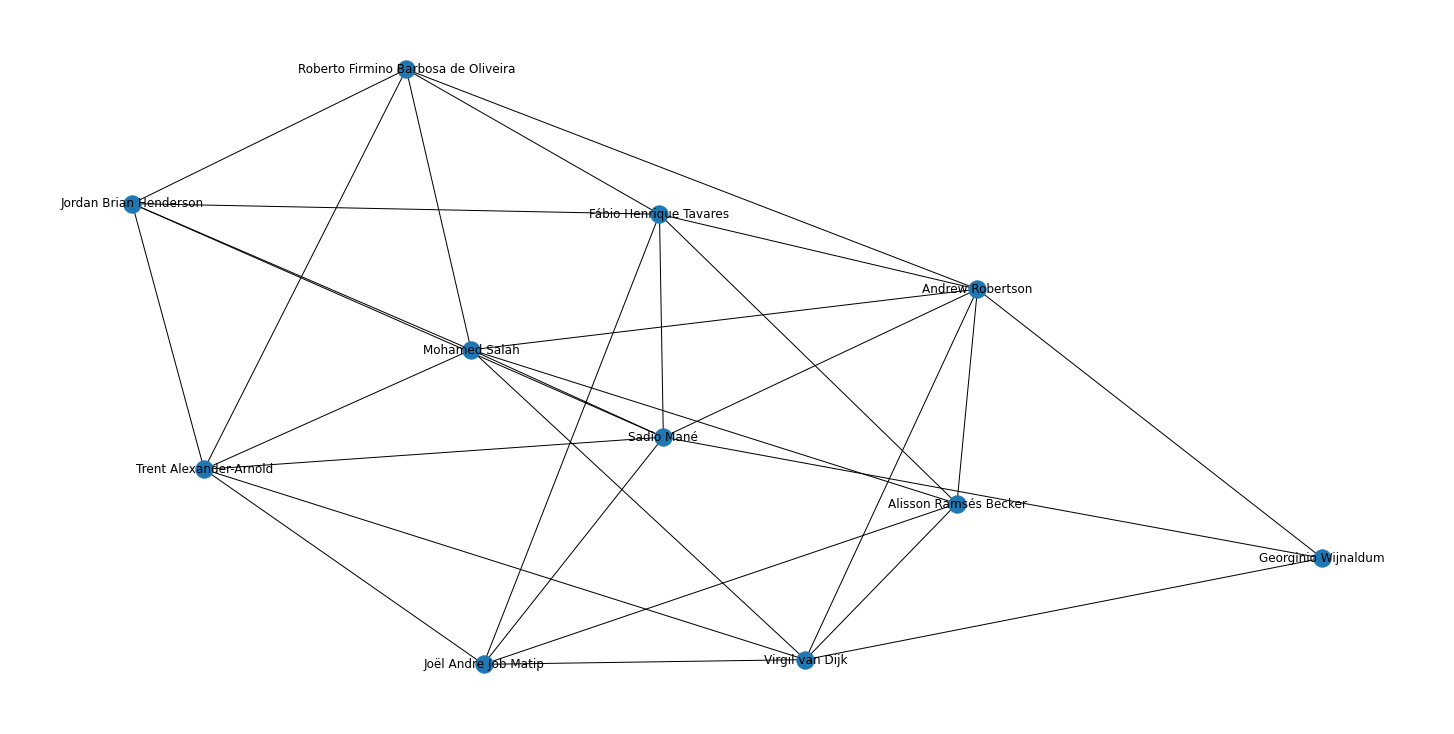

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

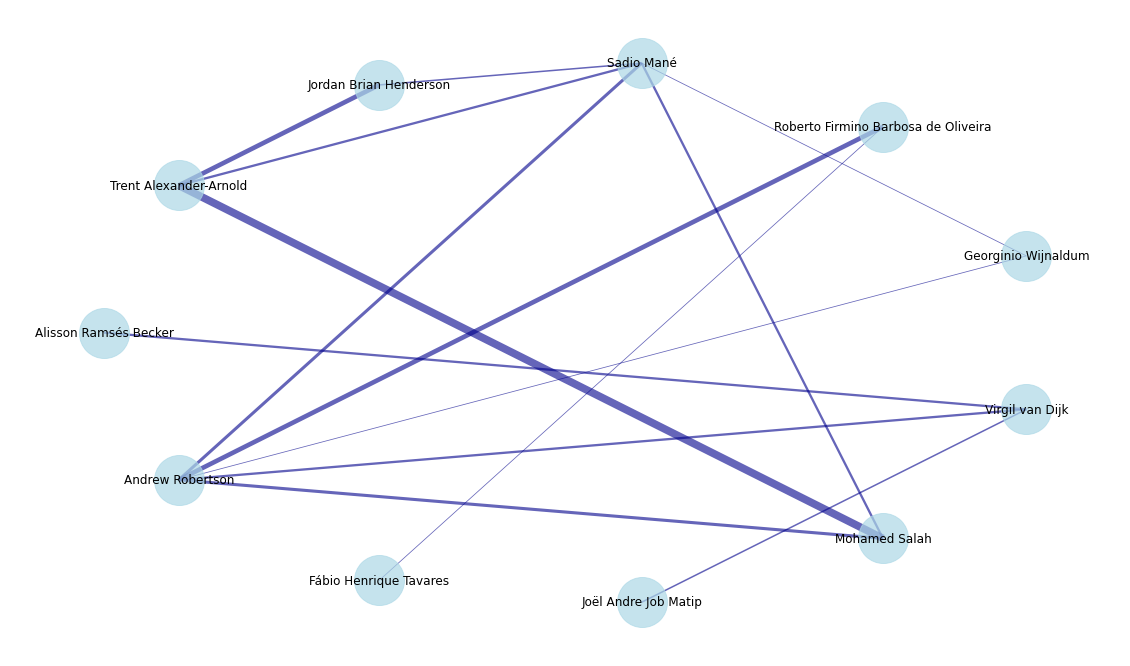

In [17]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [18]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Liverpool,Starting XI,0,NaN,NaN,NaN,NaN
2,Liverpool,Half Start,0,NaN,NaN,NaN,NaN
4,Liverpool,Half Start,45,NaN,NaN,NaN,NaN
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,Joël Andre Job Matip
7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,Sadio Mané
...,...,...,...,...,...,...,...
3154,Liverpool,Substitution,57,NaN,NaN,Roberto Firmino Barbosa de Oliveira,NaN
3155,Liverpool,Substitution,61,NaN,NaN,Georginio Wijnaldum,NaN
3159,Liverpool,Substitution,88,NaN,NaN,Sadio Mané,NaN
3161,Liverpool,Tactical Shift,77,NaN,NaN,NaN,NaN


In [19]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,Joël Andre Job Matip
7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,Sadio Mané
9,Liverpool,Pass,0,"[66.5, 15.1]","[83.7, 18.0]",Fábio Henrique Tavares,Roberto Firmino Barbosa de Oliveira
11,Liverpool,Pass,0,"[76.1, 20.3]","[87.3, 21.2]",Jordan Brian Henderson,Sadio Mané
13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",Virgil van Dijk,Georginio Wijnaldum
...,...,...,...,...,...,...,...
3130,Liverpool,Block,60,"[15.6, 37.8]",NaN,Virgil van Dijk,NaN
3136,Liverpool,Block,88,"[31.3, 59.6]",NaN,James Philip Milner,NaN
3138,Liverpool,Block,93,"[23.6, 50.6]",NaN,Jordan Brian Henderson,NaN
3139,Liverpool,Shield,15,"[7.6, 73.9]",NaN,Trent Alexander-Arnold,NaN


In [20]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
6,Liverpool,Pass,0,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,Joël Andre Job Matip,61.0,41.0
7,Liverpool,Pass,0,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,Sadio Mané,37.0,44.9
9,Liverpool,Pass,0,"[66.5, 15.1]","[83.7, 18.0]",Fábio Henrique Tavares,Roberto Firmino Barbosa de Oliveira,66.5,15.1
11,Liverpool,Pass,0,"[76.1, 20.3]","[87.3, 21.2]",Jordan Brian Henderson,Sadio Mané,76.1,20.3
13,Liverpool,Pass,0,"[60.4, 20.5]","[66.3, 20.1]",Virgil van Dijk,Georginio Wijnaldum,60.4,20.5
...,...,...,...,...,...,...,...,...,...
3130,Liverpool,Block,60,"[15.6, 37.8]",NaN,Virgil van Dijk,NaN,15.6,37.8
3136,Liverpool,Block,88,"[31.3, 59.6]",NaN,James Philip Milner,NaN,31.3,59.6
3138,Liverpool,Block,93,"[23.6, 50.6]",NaN,Jordan Brian Henderson,NaN,23.6,50.6
3139,Liverpool,Shield,15,"[7.6, 73.9]",NaN,Trent Alexander-Arnold,NaN,7.6,73.9


In [21]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Alisson Ramsés Becker,8.784783,41.453261
1,Andrew Robertson,51.290000,11.752143
2,Divock Okoth Origi,76.081818,37.528788
3,Fábio Henrique Tavares,52.864516,42.341935
4,Georginio Wijnaldum,65.240000,28.343077
5,James Philip Milner,57.155263,38.571053
6,Joe Gomez,22.283333,62.400000
7,Jordan Brian Henderson,65.438843,54.641322
8,Joël Andre Job Matip,31.935165,54.645055
9,Mohamed Salah,88.421739,55.179710


In [22]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [23]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Alisson Ramsés Becker,8.784783,41.453261,58.546739
1,Andrew Robertson,51.290000,11.752143,88.247857
2,Fábio Henrique Tavares,52.864516,42.341935,57.658065
3,Jordan Brian Henderson,65.438843,54.641322,45.358678
4,Joël Andre Job Matip,31.935165,54.645055,45.354945
5,Mohamed Salah,88.421739,55.179710,44.820290
6,Roberto Firmino Barbosa de Oliveira,78.400000,37.916304,62.083696
7,Sadio Mané,78.081295,22.738849,77.261151
8,Trent Alexander-Arnold,54.164103,64.011111,35.988889
9,Virgil van Dijk,36.230435,31.786957,68.213043


In [24]:
df3.set_index('player',inplace=True)

In [25]:

!pip install highlight_text

In [26]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


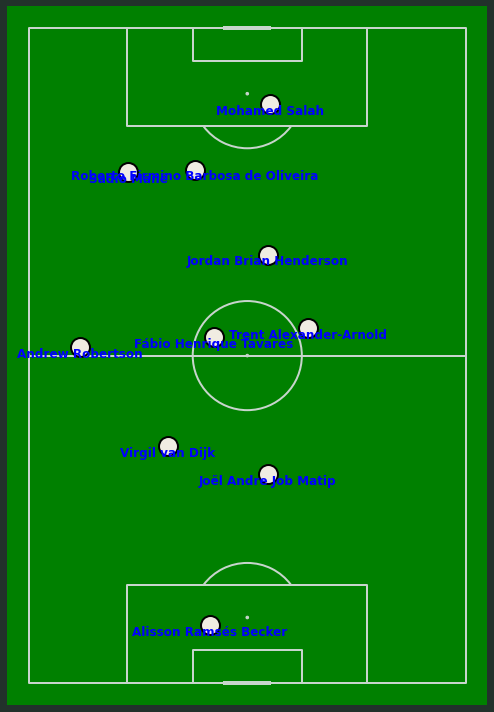

In [27]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [28]:
nx.write_gml(G, "LiverpoolvSpurs(Liv).gml")